
# Fake News Detection
Consuming news from social media is becoming popular. The explosive growth of fake news and its erosion to democracy, justice, and public trust increased the demand for fake news detection system. A comprehensive framework to systematically understand and detect fake news is necessary to attract and unite researchers in related areas to conduct research on fake news.

A large body of recent works has focused on understanding and detecting fake news stories that are disseminated on social media. To accomplish this goal, these works explore several types of features extracted from news stories, including source and posts from social media. In addition to exploring the main features proposed in the literature for fake news detection, I present a set of features and measure the prediction performance of current approaches and features for automatic detection of fake news. My results reveal interesting findings on the usefulness and importance of features for detecting false news.


A fake news are those news stories that are false: the story itself is fabricated, with no verifiable facts, sources, or quotes. When someone (or something like a bot) impersonates someone or a reliable source to false spread information, that can also be considered as fake news. In most cases, the people creating this false information have an agenda, that can be political, economical or to change the behavior or thought about a topic.

There are countless sources of fake news nowadays, mostly coming from programmed bots, that can't get tired and continue to spread false information 24/7.

Serious studies in the past 5 years, have demonstrated big correlations between the spread of false information and elections, the popular opinion or feelings about different topics.

The problem is real and hard to solve because the bots are getting better are tricking us. Is not simple to detect when the information is true or not all the time, so we need better systems that help us understand the patterns of fake news to improve our social media, communication and to prevent confusion in the world.

### Purpose
In this short code , I'll explain several ways to detect fake news using collected data from different articles. But the same techniques can be applied to different scenarios. For the coders and experts, I'll explain the Python code to load, clean, and analyse data. Then I will do some machine learning models to perform a classification task (fake or not).

### Data
The data comes from Kaggle, you can download it here:
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


There are two files, one for real news and one for fake news with a total of 23481 "fake" tweets and 21417 "real" articles.

### Analysis
All of the analysis can be found in the notebook:
https://github.com/rohansingh3121/Fake-News-Detection/blob/main/Fake-News-Detection.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Check the data
data.head()

,title,text,subject,date,target
0,BWAH-HA-HA! ARTIST BRILLIANTLY Captures Hillar...,Hillary would like American voters to believe ...,left-news,"Aug 29, 2016",fake
1,"Questions on free movement, red tape linger in...",LONDON (Reuters) - Britain s agreement with th...,worldnews,"December 8, 2017",true
2,New Zealand parties hold talks to form coaliti...,WELLINGTON (Reuters) - New Zealand s small nat...,worldnews,"October 7, 2017",true
3,Watters’ World Does The Dem Debate: “Democrats...,This is hysterical and sad at the same time. W...,politics,"Oct 18, 2015",fake
4,"Puerto Rico GO bond price dips, rescue bill mo...",NEW YORK (Reuters) - Puerto Rico’s benchmark G...,politicsNews,"June 10, 2016",true


In [9]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,BWAH-HA-HA! ARTIST BRILLIANTLY Captures Hillar...,Hillary would like American voters to believe ...,left-news,fake
1,"Questions on free movement, red tape linger in...",LONDON (Reuters) - Britain s agreement with th...,worldnews,true
2,New Zealand parties hold talks to form coaliti...,WELLINGTON (Reuters) - New Zealand s small nat...,worldnews,true
3,Watters’ World Does The Dem Debate: “Democrats...,This is hysterical and sad at the same time. W...,politics,fake
4,"Puerto Rico GO bond price dips, rescue bill mo...",NEW YORK (Reuters) - Puerto Rico’s benchmark G...,politicsNews,true


In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Hillary would like American voters to believe ...,left-news,fake
1,LONDON (Reuters) - Britain s agreement with th...,worldnews,true
2,WELLINGTON (Reuters) - New Zealand s small nat...,worldnews,true
3,This is hysterical and sad at the same time. W...,politics,fake
4,NEW YORK (Reuters) - Puerto Rico’s benchmark G...,politicsNews,true


In [11]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,hillary would like american voters to believe ...,left-news,fake
1,london (reuters) - britain s agreement with th...,worldnews,true
2,wellington (reuters) - new zealand s small nat...,worldnews,true
3,this is hysterical and sad at the same time. w...,politics,fake
4,new york (reuters) - puerto rico’s benchmark g...,politicsNews,true


In [12]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# Check
data.head()

,text,subject,target
0,hillary would like american voters to believe ...,left-news,fake
1,london reuters britain s agreement with the e...,worldnews,true
2,wellington reuters new zealand s small nation...,worldnews,true
3,this is hysterical and sad at the same time wa...,politics,fake
4,new york reuters puerto rico’s benchmark gene...,politicsNews,true


In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,hillary would like american voters believe alt...,left-news,fake
1,london reuters britain agreement european unio...,worldnews,true
2,wellington reuters new zealand small nationali...,worldnews,true
3,hysterical sad time watters world discusses de...,politics,fake
4,new york reuters puerto rico’s benchmark gener...,politicsNews,true


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


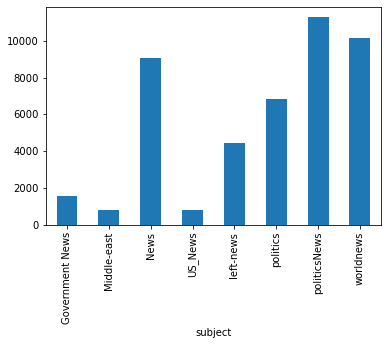

In [16]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


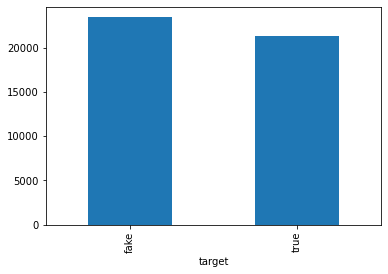

In [17]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

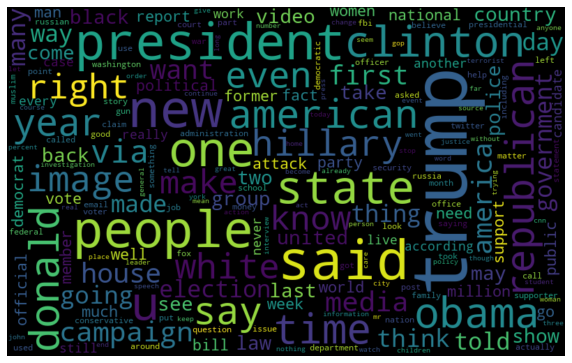

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

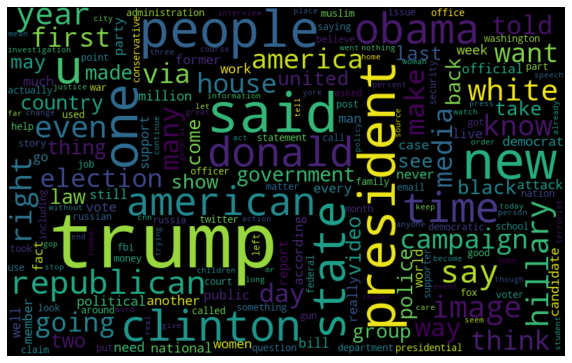

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

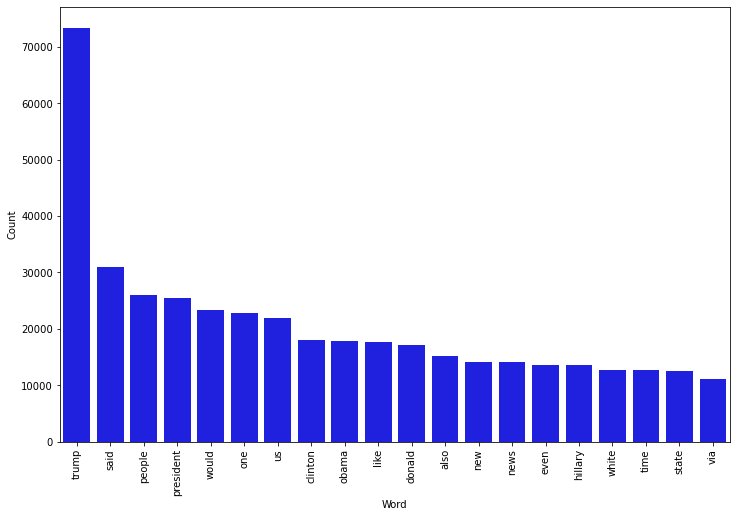

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

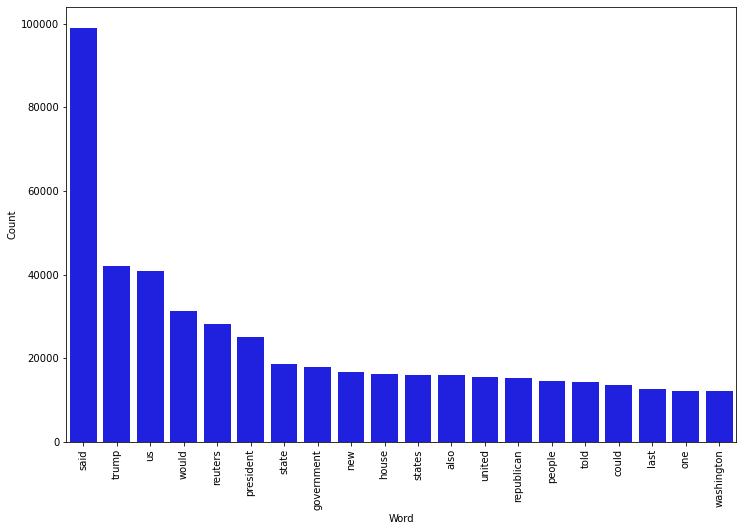

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [23]:
# Function to plot the confusion matrix
# (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [24]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### Logistic regression

In [25]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.91%


Confusion matrix, without normalization


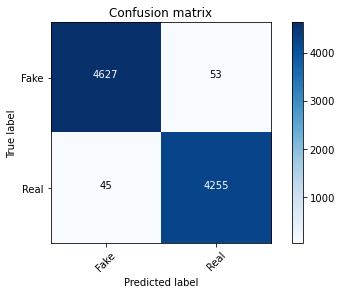

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.73%


Confusion matrix, without normalization


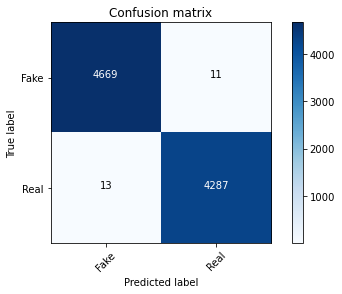

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.23%


Confusion matrix, without normalization


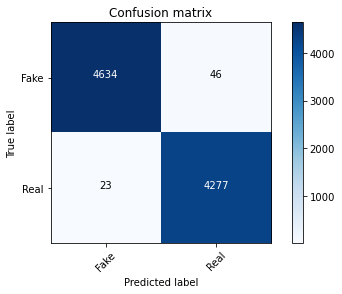

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])